# Creating NGO Proximity Searches
## Claude de Rijke-Thomas
## Sat 25th April 2020

In [1]:
import numpy as np
import scipy.spatial as spatial
import sklearn
import utm
from pyproj import Proj
import string
import random
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
class NGO:
    def __init__(self, ngo_id, ngo_name, ngo_loc_lon_lat, ngo_radius, ngo_speciality=None, ngo_loc_metres=None,
                 ngo_zone_number=None,ngo_zone_designator=None, ngo_number=None, ngo_url=None):
        """ An object representing the data for a single NGO"""
        self.id = ngo_id
        self.name = ngo_name
        self.loc_lon_lat = ngo_loc_lon_lat
        self.radius = ngo_radius #in m
        self.speciality = ngo_speciality
        self.loc_metres=ngo_loc_metres
        self.zone_designator=ngo_zone_designator
        self.zone_number=ngo_zone_number
        self.number=ngo_number
        self.url = ngo_url
    def add_location(self, ngo_loc_lon_lat):
        if self.loc_lon_lat is None:
            self.loc_lon_lat = []
        self.location.append(ngo_location)
    def add_speciality(self, ngo_speciality):
        if self.speciality is None:
            self.speciality = []
        self.speciality.append(ngo_speciality)
    def add_loc_metres(self, coords_tuple):
        if self.loc_metres is None:
            self.loc_metres = []
        if len(self.loc_metres)==0:
            self.loc_metres.extend([coords_tuple[0], coords_tuple[1]])
    def add_zone_number(self, ngo_zone_number):
        if self.zone_number is None:
            self.zone_number=ngo_zone_number
    def add_zone_designator(self, ngo_zone_designator):
        if self.zone_designator is None:
            self.zone_designator=(ngo_zone_designator)
    def add_number(self, ngo_number):
        if self.number is None:
            self.number=(ngo_number)
    def add_url(self, ngo_url):
        if self.url is None:
            self.url=(ngo_url)
class Human:
    def __init__(self, human_id, human_name, human_loc_lon_lat, human_speciality=None, human_loc_metres=None, 
                 human_zone_number=None,human_zone_designator=None):
        """ An object representing the data for a single Human"""
        self.id = human_id
        self.name = human_name
        self.loc_lon_lat = human_loc_lon_lat
        self.speciality = human_speciality
        self.loc_metres=human_loc_metres
        self.zone_designator=human_zone_designator
        self.zone_number=human_zone_number
    def add_location(self, human_loc_lon_lat):
        if self.loc_lon_lat is None:
            self.loc_lon_lat = []
        self.location.append(human_location)
    def add_speciality(self, human_speciality):
        if self.speciality is None:
            self.speciality = []
        self.speciality.append(human_speciality)
    def add_loc_metres(self, coords_tuple):
        if self.loc_metres is None:
            self.loc_metres = []
        if len(self.loc_metres)==0:
            self.loc_metres.extend([coords_tuple[0], coords_tuple[1]])
    def add_zone_number(self, human_zone_number):
        if self.zone_number is None:
            self.zone_number=human_zone_number
    def add_zone_designator(self, human_zone_designator):
        if self.zone_designator is None:
            self.zone_designator=(human_zone_designator)            
            

In [3]:
ngo_obj_arr = []
for i in range(10000):
    name=""
    for j in range(np.random.randint(3,12)):
        name+=random.choice(string.ascii_letters)
    ngo = NGO(np.random.bytes(10), name, [np.random.random()*180-90,np.random.random()*160-80], np.random.randint(1000000), "domestic abuse")
    ngo_obj_arr.append(ngo)

In [4]:
for ngo_obj in ngo_obj_arr:
    _,_,zone_number,zone_designator =utm.from_latlon(ngo_obj.loc_lon_lat[1], ngo_obj.loc_lon_lat[0])
    myProj = Proj("+proj=utm +zone="+str(zone_number)+str(zone_designator)+", +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
    UTMx, UTMy = myProj(ngo_obj.loc_lon_lat[0], ngo_obj.loc_lon_lat[1])
    ngo_obj.add_loc_metres([UTMx,UTMy])
    ngo_obj.add_zone_number(zone_number)
    number="07"
    for j in range(9):
        number+=random.choice(string.digits)
    ngo_obj.add_zone_designator(zone_designator)
    ngo_obj.add_number(number)

In [5]:
human_obj = Human(np.random.bytes(10), "name", [-3,53],"domestic abuse")
_,_,zone_number,zone_designator =utm.from_latlon(human_obj.loc_lon_lat[1], human_obj.loc_lon_lat[0])
myProj = Proj("+proj=utm +zone="+str(zone_number)+str(zone_designator)+", +north +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
UTMx, UTMy = myProj(human_obj.loc_lon_lat[0], human_obj.loc_lon_lat[1])
human_obj.add_loc_metres([UTMx,UTMy])
human_obj.add_zone_number(zone_number)
human_obj.add_zone_designator(zone_designator)

In [6]:
zonal_ngo_obj_arr = []
for ngo_obj in ngo_obj_arr:
    if ngo_obj.zone_number==human_obj.zone_number and ngo_obj.zone_designator==human_obj.zone_designator:
        zonal_ngo_obj_arr.append(ngo_obj)

In [7]:
print("The number of NGO's in the UTM Zone are:",len(zonal_ngo_obj_arr))

The number of NGO's in the UTM Zone are: 15


In [8]:
successful_ngo_obj_arr = []
for ngo_obj in zonal_ngo_obj_arr:
    if ngo_obj.radius > np.sqrt((human_obj.loc_metres[0]-ngo_obj.loc_metres[0])**2 + (human_obj.loc_metres[1]-ngo_obj.loc_metres[1])**2):
        successful_ngo_obj_arr.append(ngo_obj)
print("The number of NGO's available to the individual that fit the individual\'s requirements is: ",len(successful_ngo_obj_arr))
successful_ngo_names = [ngo_obj.name for ngo_obj in successful_ngo_obj_arr]
successful_ngo_numbers= [ngo_obj.number for ngo_obj in successful_ngo_obj_arr]
succ_name_n0_arr = [[ngo_obj.name,ngo_obj.number] for ngo_obj in successful_ngo_obj_arr]
print("The names and numbers of the NGO's available to the individual that fit the individual\'s requirements are: \n",succ_name_n0_arr)

The number of NGO's available to the individual that fit the individual's requirements is:  11
The names and numbers of the NGO's available to the individual that fit the individual's requirements are: 
 [['FbG', '07882531684'], ['jZXBSyGwD', '07541137966'], ['bBrAxZ', '07026577578'], ['TwUDQk', '07623273553'], ['RseIVuRURav', '07692131190'], ['wJhEYHJGv', '07132904788'], ['glIdCX', '07350769056'], ['zIj', '07899818161'], ['FuPmuri', '07391221292'], ['KtkLGJj', '07062801272'], ['vgo', '07431734315']]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  


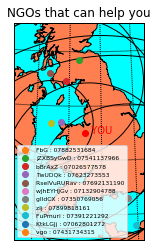

In [34]:
m = Basemap(llcrnrlon=human_obj.loc_lon_lat[0]-4,llcrnrlat=human_obj.loc_lon_lat[1]-4,urcrnrlon=human_obj.loc_lon_lat[0]+4,urcrnrlat=human_obj.loc_lon_lat[1]+4,
            resolution='i',projection='tmerc',lon_0=human_obj.loc_lon_lat[0],lat_0=human_obj.loc_lon_lat[1])

# can get the identical map this way (by specifying width and
# height instead of lat/lon corners)
#m = Basemap(width=894887,height=1116766,\
#            resolution='i',projection='tmerc',lon_0=-4.36,lat_0=54.7)
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-40,61.,2.))
m.drawmeridians(np.arange(-20.,21.,2.))
m.drawmapboundary(fill_color='aqua')

m.plot(-31.309766758666633,30.153934929519664 )

xy_human=m(human_obj.loc_lon_lat[0],human_obj.loc_lon_lat[1])
m.plot(xy_human[0],xy_human[1],"o",color='r')
plt.annotate("  YOU", (xy_human[0], xy_human[1]), color= 'r')
for ngo_obj in successful_ngo_obj_arr:
    xy_ngo=m(ngo_obj.loc_lon_lat[0],ngo_obj.loc_lon_lat[1])
    m.plot(xy_ngo[0],xy_ngo[1],"o", label=ngo_obj.name+" : "+ngo_obj.number)
    circle = Circle(xy_ngo,radius=ngo_obj.radius, fill=False) #(m.ymax - m.ymin)/3
    plt.gca().add_patch(circle)
# m.plot(human_obj.loc_lon_lat[0], human_obj.loc_lon_lat[1],"o", label="HUMAN")
# xy=m(-4,53)
# m.plot(xy[0],xy[1],"o", label="COVID1")
# circle = Circle(xy,radius=60000, fill=False) #(m.ymax - m.ymin)/3
# plt.gca().add_patch(circle)
plt.legend(loc='lower left', prop={'size': 6})
plt.title("NGOs that can help you")
plt.savefig("NGOsThatCanHelpYou.png", dpi=2000)
plt.show()